In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model


### Create File DataFrame

In [2]:
image_dir = Path('C:\\Users\\dknjy\\OneDrive\\바탕 화면\\shapes')


filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split((os.path.split(x)[0]))[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_df = pd.concat([filepaths, labels], axis=1)
train_df, test_df = train_test_split(images_df, train_size=0.7, shuffle=True, random_state=0)

In [3]:
train_df

,Filepath,Label
282,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
44,C:\Users\dknjy\OneDrive\바탕 화면\shapes\circles\d...,circles
272,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
189,C:\Users\dknjy\OneDrive\바탕 화면\shapes\squares\d...,squares
152,C:\Users\dknjy\OneDrive\바탕 화면\shapes\squares\d...,squares
...,...,...
251,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
192,C:\Users\dknjy\OneDrive\바탕 화면\shapes\squares\d...,squares
117,C:\Users\dknjy\OneDrive\바탕 화면\shapes\squares\d...,squares
47,C:\Users\dknjy\OneDrive\바탕 화면\shapes\circles\d...,circles


In [4]:
test_df

,Filepath,Label
208,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
188,C:\Users\dknjy\OneDrive\바탕 화면\shapes\squares\d...,squares
12,C:\Users\dknjy\OneDrive\바탕 화면\shapes\circles\d...,circles
221,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
239,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
...,...,...
76,C:\Users\dknjy\OneDrive\바탕 화면\shapes\circles\d...,circles
212,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
225,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles
255,C:\Users\dknjy\OneDrive\바탕 화면\shapes\triangles...,triangles


### Loading Image Data

In [5]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation'
)

test_images = train_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(28, 28),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

Found 168 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.
Found 90 validated image filenames belonging to 3 classes.


### Visualization

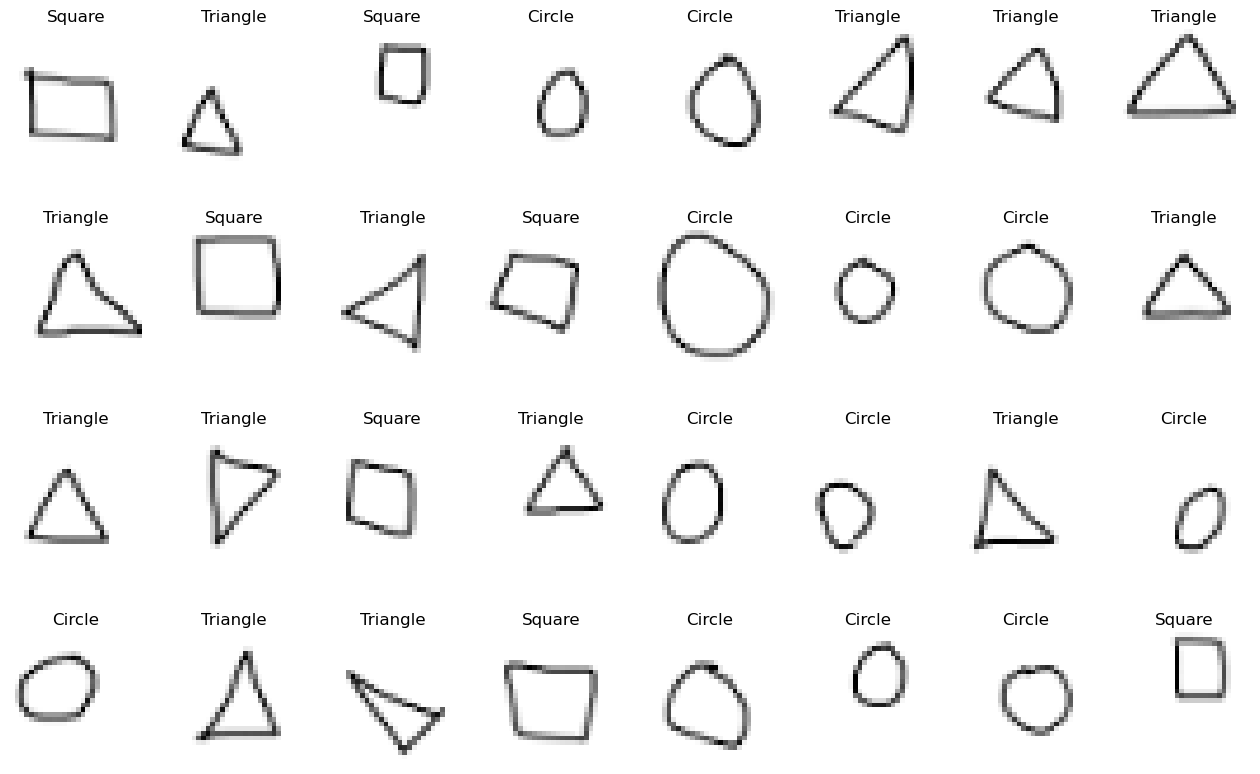

In [7]:
images = train_images[0][0]
labels = pd.Series(map(lambda x: x.argmax(), train_images[0][1][:])).map(
    {0: "Circle", 1: "Square", 2:"Triangle"})
    

plt.figure(figsize=(16, 10))

for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

### Model Training

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True, save_weights_only=True)
    ]
)





Epoch 1/100


6/6 [==============================] - 2s 84ms/step - loss: 1.1004 - accuracy: 0.3274 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
6/6 [==============================] - 0s 39ms/step - loss: 1.0991 - accuracy: 0.3512 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 43ms/step - loss: 1.0984 - accuracy: 0.3512 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 1.0976 - accuracy: 0.3512 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 0s 32ms/step - loss: 1.0974 - accuracy: 0.3512 - val_loss: 1.1000 - val_accuracy: 0.3333
Epoch 6/100
6/6 [==============================] - 0s 40ms/step - loss: 1.0978 - accuracy: 0.3512 - val_loss: 1.0973 - val_accuracy: 0.3333
Epoch 7/100
6/6 [==============================] - 0s 36ms/step - loss: 1.0983 - accuracy: 0.3929 - val_loss: 1.0960 - val_accuracy: 0.5000
Epoch 8/100
6/6

In [16]:
model.load_weights('C:\\Users\\dknjy\\.anaconda\\Deep\\model.h5')

### Results

In [17]:
results = model.evaluate(test_images, verbose=0)
print("Loss: {:.4f}".format(results[0]))
print("Accuracy: {:.2f} %".format(results[1] * 100))

Loss: 0.5967
Accuracy: 66.67 %
